<a href="https://colab.research.google.com/github/danhorsley/lambda_kaggle_comp/blob/master/kaggle_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files

In [140]:
uploaded=files.upload()

Saving test_features.csv to test_features (1).csv


In [0]:
df=pd.read_csv('train_features.csv')

In [85]:
df=df.drop('id',axis=1)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [33]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [52]:
region_dict={}
diff_list=[]
for i in range(len(df)):
  if df[['region','region_code']].loc[i][0] not in region_dict.keys():
    region_dict[df[['region','region_code']].loc[i][0]]=df[['region','region_code']].loc[i][1]
  else:
    if region_dict[df[['region','region_code']].loc[i][0]] != df[['region','region_code']].loc[i][1]:
      bbb=(df[['region','region_code']].loc[i][0],df[['region','region_code']].loc[i][1])
      diff_list.append(bbb)
    
region_dict

{'Arusha': 2,
 'Dar es Salaam': 7,
 'Dodoma': 1,
 'Iringa': 11,
 'Kagera': 18,
 'Kigoma': 16,
 'Kilimanjaro': 3,
 'Lindi': 80,
 'Manyara': 21,
 'Mara': 20,
 'Mbeya': 12,
 'Morogoro': 5,
 'Mtwara': 90,
 'Mwanza': 19,
 'Pwani': 60,
 'Rukwa': 15,
 'Ruvuma': 10,
 'Shinyanga': 17,
 'Singida': 13,
 'Tabora': 14,
 'Tanga': 4}

{'Arusha': 2,
 'Dar es Salaam': 7,
 'Dodoma': 1,
 'Iringa': 11,
 'Kagera': 18,
 'Kigoma': 16,
 'Kilimanjaro': 3,
 'Lindi': 80,
 'Manyara': 21,
 'Mara': 20,
 'Mbeya': 12,
 'Morogoro': 5,
 'Mtwara': 90,
 'Mwanza': 19,
 'Pwani': 6,
 'Rukwa': 15,
 'Ruvuma': 10,
 'Shinyanga': 17,
 'Singida': 13,
 'Tabora': 14,
 'Tanga': 4}

In [0]:
region_dict={'Arusha': 2, 'Dar es Salaam': 7, 'Dodoma': 1, 'Iringa': 11, 'Kagera': 18, 'Kigoma': 16, 'Kilimanjaro': 3, 'Lindi': 80, 'Manyara': 21, 'Mara': 20, 'Mbeya': 12, 'Morogoro': 5, 'Mtwara': 90, 'Mwanza': 19, 'Pwani': 6, 'Rukwa': 15, 'Ruvuma': 10, 'Shinyanga': 17, 'Singida': 13, 'Tabora': 14, 'Tanga': 4}

differences

[('Pwani', 6),
 ('Lindi', 18),
 ('Mtwara', 99),
 ('Arusha', 24),
 ('Mtwara', 9),
 ('Mwanza', 17),
 ('Lindi', 8),
 ('Tanga', 5),
 ('Shinyanga', 14),
 ('Shinyanga', 11),
 ('Pwani', 40)]
 

In [83]:
#we map region codes using new dictionary
df['region_code']=df['region'].map(region_dict)
df['region_code'].value_counts()

11    5294
17    4982
12    4639
3     4379
5     4006
2     3350
18    3316
19    3102
16    2816
10    2640
60    2635
4     2547
1     2201
13    2093
20    1969
14    1959
15    1808
90    1730
21    1583
80    1546
7      805
Name: region_code, dtype: int64

In [82]:
len(df[(df['region']=='Pwani') & (df['region_code']==60)])

1025

In [56]:
diff_list
filter_diff_list=[]
for x in  diff_list:
  if x not in filter_diff_list:
    filter_diff_list.append(x)
filter_diff_list

[('Pwani', 6),
 ('Lindi', 18),
 ('Mtwara', 99),
 ('Arusha', 24),
 ('Mtwara', 9),
 ('Mwanza', 17),
 ('Lindi', 8),
 ('Tanga', 5),
 ('Shinyanga', 14),
 ('Shinyanga', 11),
 ('Pwani', 40)]

In [0]:
def valuecounter(dataframe):
  counts_list=[]
  for col in dataframe.columns:
    aaa=(col,len(list(df[col].value_counts().index)),str(df[col].dtype))
    counts_list.append(aaa)
  return counts_list
  

In [86]:
#these columns are all suitable for category encoding
vc=valuecounter(df)
category_list=[x[0] for x in vc if x[1]<30 and x[2]=='object']
category_list

['basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [89]:
#we should drop all of these  for the first attempt
[x for x in vc if x[1]>30 and x[2]=='object']

[('date_recorded', 356, 'object'),
 ('funder', 1897, 'object'),
 ('installer', 2145, 'object'),
 ('wpt_name', 37400, 'object'),
 ('subvillage', 19287, 'object'),
 ('lga', 125, 'object'),
 ('ward', 2092, 'object'),
 ('scheme_name', 2696, 'object')]

In [122]:
numeric_columns=list(df.describe(include=np.number).columns)
features=category_list+numeric_columns
features

['basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [0]:
X=df.copy()[features]

In [132]:
y=pd.read_csv('train_labels.csv')
y=y.drop('id',axis=1)
y_dict={'functional':1,'non functional':0,'functional needs repair':2}
y['status_group']=y['status_group'].map(y_dict)
y.head()

,status_group
0,1
1,1
2,1
3,0
4,1


In [133]:
#fairly balanced with 58% functional.  this should be a good baseline
y['status_group'].value_counts(normalize=True)

1    0.543081
0    0.384242
2    0.072677
Name: status_group, dtype: float64

In [134]:
y.isna().sum()

status_group    0
dtype: int64

In [107]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.4MB/s 


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
preprocessor = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(),RobustScaler())

preprocessor.fit(X)

def process_data(frame):
  X=frame.copy()[features]
  X = preprocessor.transform(X)
  X=pd.DataFrame(X,columns=features)
  
  return X

In [0]:
X=process_data(X)

In [128]:
X.isna().sum()

basin                    0
region                   0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
num_private              0
region_code              0
district_code            0
population               0
construction_year        0
dtype: int64

In [135]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random

#first we can have a look at xgbclassifier on randomized search cv maximising for rocauc
param_distributions = {
    'n_estimators':randint(65,130),
    'max_depth':randint(5,15)}#,
   #  'booster': random.choice('gbtree', 'gblinear' ,'dart')}

search=RandomizedSearchCV(
      estimator=RandomForestClassifier(n_jobs=-1,random_state=42),
      param_distributions=param_distributions,
      n_iter=50,
      scoring='accuracy',
      n_jobs=-1,
      cv=3,
      verbose=10,
      return_train_score=True)

search.fit(X,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 10

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f93e98dc898>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f93e98dc9e8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=10)

In [136]:
 #best estimators are 14/92, 14/110 and 14/78
  pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
48,9.406687,0.232616,0.661796,0.052273,14,92,"{'max_depth': 14, 'n_estimators': 92}",0.793131,0.794192,0.791364,0.792896,0.001167,1,0.852121,0.853157,0.854066,0.853114,0.000794
30,10.837407,0.117382,0.797653,0.048781,14,110,"{'max_depth': 14, 'n_estimators': 110}",0.792626,0.794646,0.790606,0.792626,0.001649,2,0.851313,0.852828,0.853914,0.852685,0.001067
6,7.895439,0.235213,0.627576,0.006802,14,78,"{'max_depth': 14, 'n_estimators': 78}",0.792222,0.794798,0.790808,0.792609,0.001652,3,0.851566,0.853409,0.854192,0.853056,0.001101
16,9.848577,0.193122,0.767648,0.048279,14,103,"{'max_depth': 14, 'n_estimators': 103}",0.792374,0.794091,0.790606,0.792357,0.001423,4,0.851667,0.852904,0.853460,0.852677,0.000749
10,10.388055,0.225245,0.833781,0.080502,14,101,"{'max_depth': 14, 'n_estimators': 101}",0.792374,0.794141,0.790202,0.792239,0.001611,5,0.851869,0.852626,0.853384,0.852626,0.000619


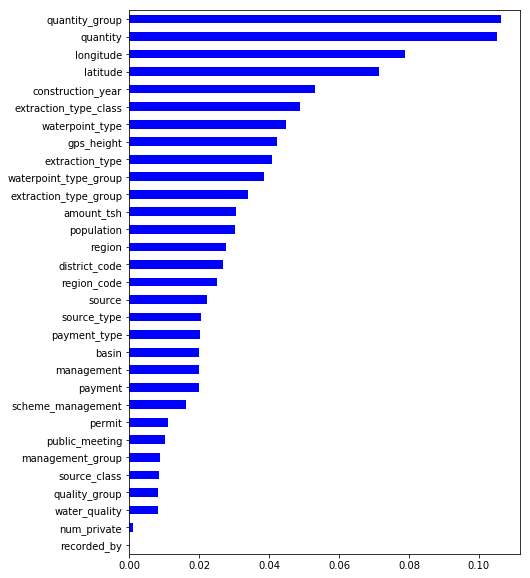

In [139]:
import matplotlib.pyplot as plt
model=search.best_estimator_
FI = pd.Series(model.feature_importances_, X.columns)
FI=FI.sort_values()
plt.figure(figsize=(7,10))
FI.plot.barh(color='blue');
#loos like we can drop recorded by and num_private if we wanted to

In [143]:
test=pd.read_csv('test_features (1).csv')
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [145]:
X_test=test[features].copy()
X_test=process_data(X_test)
X_test.head()

,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,0.0,-0.727273,0.0,0.0,2.25,0.0,1.00,1.333333,1.0,8.0,3.0,-0.5,-0.5,0.0,0.0,3.0,3.0,-0.4,-0.4,1.0,1.0,2.0,0.0,1.233276,0.093457,0.184468,0.0,0.692308,0.000000,1.376744,0.012974
1,-0.4,0.545455,0.0,0.0,0.00,0.0,-0.25,-0.333333,-0.5,0.0,0.0,-0.5,-0.5,0.0,0.0,1.0,1.0,-0.6,-0.6,0.0,-0.5,0.0,0.0,0.909608,0.427580,0.328391,0.0,-0.769231,-0.333333,1.279070,0.006986
2,0.0,0.727273,0.0,0.0,0.00,1.0,1.00,1.333333,1.0,0.0,0.0,-0.5,-0.5,0.0,0.0,1.0,1.0,-0.4,-0.4,1.0,1.0,2.0,0.0,0.908092,-0.034462,0.003309,0.0,0.076923,-0.333333,2.209302,0.011976
3,-0.2,0.363636,1.0,0.0,0.00,0.0,1.00,1.333333,1.0,0.0,0.0,0.5,0.5,0.0,0.0,2.0,2.0,0.4,0.4,0.0,1.0,2.0,0.0,-0.077317,0.770370,-0.843246,0.0,5.230769,13.333333,1.046512,0.000499
4,-0.2,-0.090909,1.0,0.0,1.25,0.0,-0.25,-0.333333,-0.5,4.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,-0.6,-0.6,0.0,-0.5,0.0,25.0,0.675384,0.023821,-1.136994,0.0,-0.153846,0.000000,0.162791,0.006986


In [147]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [148]:
reverse_dict={v: k for k, v in y_dict.items()}
reverse_dict

{0: 'non functional', 1: 'functional', 2: 'functional needs repair'}

In [0]:
def subber(frame,y_pred):
  temp_frame=pd.DataFrame(frame.copy()['id'])
  temp_frame['status_group']=y_pred
  temp_frame['status_group']=temp_frame['status_group'].map(reverse_dict)
  
  return temp_frame

In [161]:
sub_df = subber(test,y_pred)
sub_df.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
sub_df.to_csv('sub_csv',index=False)

In [0]:
files.download('sub_csv')